# 인구 이동 데이터 시각화

In [1]:
# 노령인구 
# 키오스크 : 카메라로 사람의 나이를 판단하게 만든다. 50대 이상 -> gui 커피한잔줘 -> 바닐라 라떼주문 
# CS 

# 필요한 모듈 import

In [2]:
import pandas as pd 
# import matplotlib.pyplot as plt

# Dataset Import
- 데이터 다운로드 :  https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B26003_A01&conn_path=I2
- 기간설정 : 1970년 ~ 현재
- 파일형식 csv
- 다운로드

In [3]:
# 필요한 모듈을 import 하고 데이터를 df 라는 변수에 지정하세요
# Nan 값은 0으로 채워져야 하며 아래와 같은 내용으로 출력되어야 합니다. 
# 1970년 ~ 2021년 까지의 데이터 또는 1970 ~ 2022 년(누적데이터) 로 컬럼을 변경 하세요 
df = pd.read_csv("07_101_DT_1B26003_A01_20221208093347.csv", encoding="cp949").fillna(0)

In [4]:
# 맨위 5줄만 표시 하시오 

In [5]:
# df.head(5)

In [6]:
# 전출지가 서울인 사람이 서울이 아닌곳으로 전입한 행을 선택하여 df2에 저장하세요 
# 서울(전출) -> 타지역(전입)

In [7]:
mask = (df["전출지별"]=="서울특별시") & (df["전입지별"] != "서울특별시")& (df["항목"] == "이동자수[명]")
df_2 = df[mask]

In [8]:
df_2.head()

,전출지별,전입지별,항목,단위,2000.01 월,2000.02 월,2000.03 월,2000.04 월,2000.05 월,2000.06 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,Unnamed: 278
36,서울특별시,전국,이동자수[명],명,135267.0,190149.0,237393.0,207976.0,212656.0,181783.0,...,138891,123192,99394,107739,93015,92319,104172,91087,91844,0.0
40,서울특별시,부산광역시,이동자수[명],명,1238.0,1810.0,1855.0,1297.0,1454.0,1177.0,...,1465,1211,848,874,865,862,967,786,714,0.0
42,서울특별시,대구광역시,이동자수[명],명,769.0,1186.0,1262.0,863.0,871.0,694.0,...,997,867,608,586,535,558,622,494,494,0.0
44,서울특별시,인천광역시,이동자수[명],명,3098.0,4154.0,5530.0,4815.0,5292.0,4271.0,...,4531,4126,3199,3835,3341,3840,4035,3340,3279,0.0
46,서울특별시,광주광역시,이동자수[명],명,889.0,1392.0,1338.0,964.0,1034.0,869.0,...,743,674,436,462,415,421,565,399,392,0.0


In [9]:
set(df["전출지별"])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전국',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [10]:
# 컬럼을 전출지별, 전입지별, 항목, 1970 년, 1971년, ..., 2022. 10월 로 정렬 하시오

In [11]:
df_2.columns[4:][0]

'2000.01 월'

In [12]:
# pd.to_datetime('2000년01월', format="%Y년%m월")
# pd.to_datetime(df_2.columns[4:][0].replace(" 월", "월").replace(".","년"), format="%y년%m월")
pd.to_datetime(df_2.columns[4:-1], format="%Y.%m 월")

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01'],
              dtype='datetime64[ns]', length=274, freq=None)

In [13]:
df_3 = df_2[list(df_2.columns[0:3]) + sorted(list(df_2.columns)[4:])]

In [14]:
df_3.head(2)

,전출지별,전입지별,항목,2000.01 월,2000.02 월,2000.03 월,2000.04 월,2000.05 월,2000.06 월,2000.07 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,Unnamed: 278
36,서울특별시,전국,이동자수[명],135267.0,190149.0,237393.0,207976.0,212656.0,181783.0,152659.0,...,138891,123192,99394,107739,93015,92319,104172,91087,91844,0.0
40,서울특별시,부산광역시,이동자수[명],1238.0,1810.0,1855.0,1297.0,1454.0,1177.0,1145.0,...,1465,1211,848,874,865,862,967,786,714,0.0


In [15]:
# 전출지별과 항목 컬럼을 삭제하고, index를 전입지 별로 지정하시오 

In [16]:
df_4 = df_3.drop(["전출지별", "항목"], axis=1)
df_4.set_index("전입지별", inplace=True)
df_4.head(2)


,2000.01 월,2000.02 월,2000.03 월,2000.04 월,2000.05 월,2000.06 월,2000.07 월,2000.08 월,2000.09 월,2000.10 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,Unnamed: 278
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,135267.0,190149.0,237393.0,207976.0,212656.0,181783.0,152659.0,174256.0,169657.0,217304.0,...,138891,123192,99394,107739,93015,92319,104172,91087,91844,0.0
부산광역시,1238.0,1810.0,1855.0,1297.0,1454.0,1177.0,1145.0,1327.0,1040.0,1318.0,...,1465,1211,848,874,865,862,967,786,714,0.0


In [17]:
# 서울에서 경기도로 이동한 인구 데이터를 df_su2ggd에 저장하세요. 

In [18]:
df_su2ggd = df_4.loc["경기도"][:-1]

In [19]:
df_su2ggd

2000.01 월    28347.0
2000.02 월    37023.0
2000.03 월    43870.0
2000.04 월    38297.0
2000.05 월    40503.0
              ...   
2022.06 월    20665.0
2022.07 월    20417.0
2022.08 월    23178.0
2022.09 월    21247.0
2022.10 월    21229.0
Name: 경기도, Length: 274, dtype: float64

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [21]:
 import warnings 
 warnings.filterwarnings('ignore')

In [22]:
from matplotlib import font_manager as fm

In [115]:
# # mac
# from matplotlib import font_manager, rc
# font_path = "/System/Library/Fonts/Supplemental/AppleMyungjo.ttf"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)


# #윈도우
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/HANDotum.ttf"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)


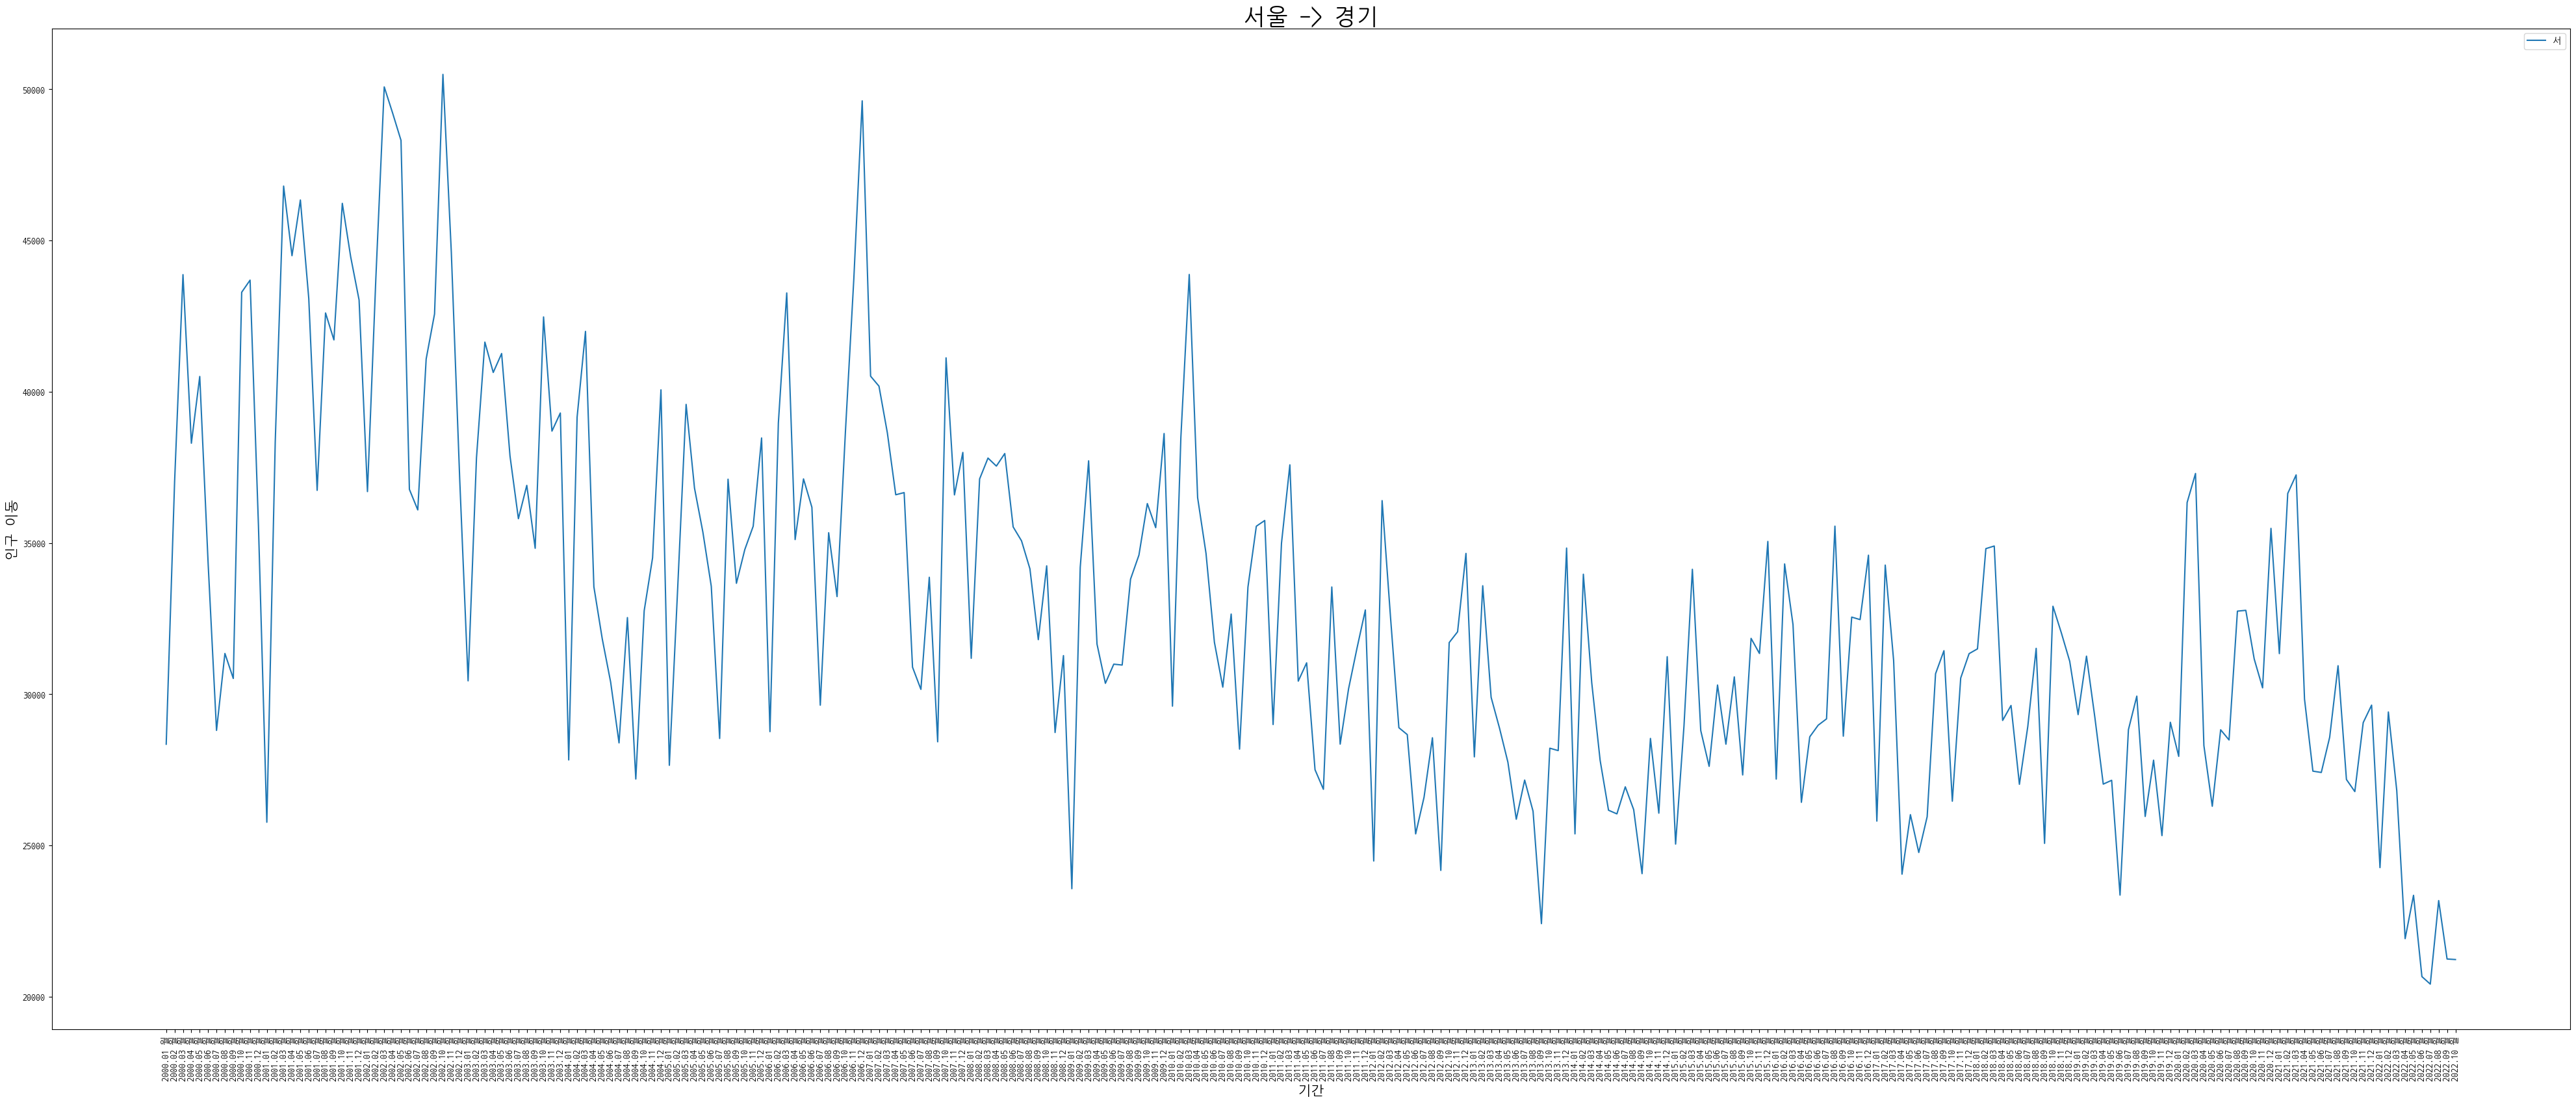

In [24]:
plt.figure(figsize=(50, 20))

# 한글폰트 지정
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname= path, size=50).get_name()
plt.rc("font", family = font_name)

# import matplotlib
# matplotlib.rcParams['font.family'] = "Ubuntu"
# matplotlib.rcParams['axes.unicode_minus'] =False


plt.plot(df_su2ggd.index, df_su2ggd.values)
plt.xticks(rotation="vertical", size= 10)
plt.title("서울 -> 경기", size = 25)

plt.xlabel("기간", size=15)
plt.ylabel("인구 이동", size=15)

plt.legend(labels="서울 -> 경기", loc="best")


<AxesSubplot: >

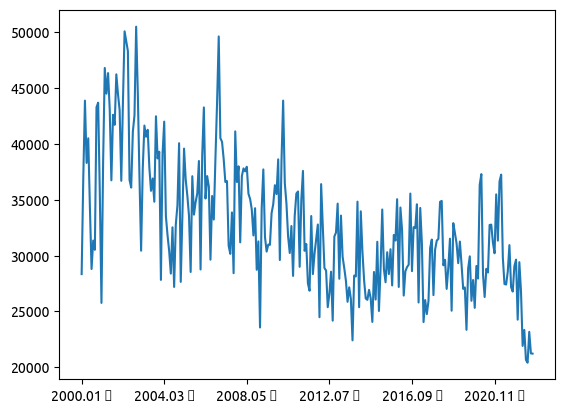

In [58]:
# 서울에서 경기도로 이동한 인구를 plot으로 나타내 보세요 
df_su2ggd.plot()

- Matplotlib 스타일 리스트 출력

In [59]:
plt.style.available
plt.style.use("ggplot")

In [60]:
# 서울에서 경기도로 이동한 데이터와 서울에서 부산으로 이동한 인구를 동시에 plot에 표현해 보세요 
df_su2bs = df_4.loc["부산광역시"][:-1]

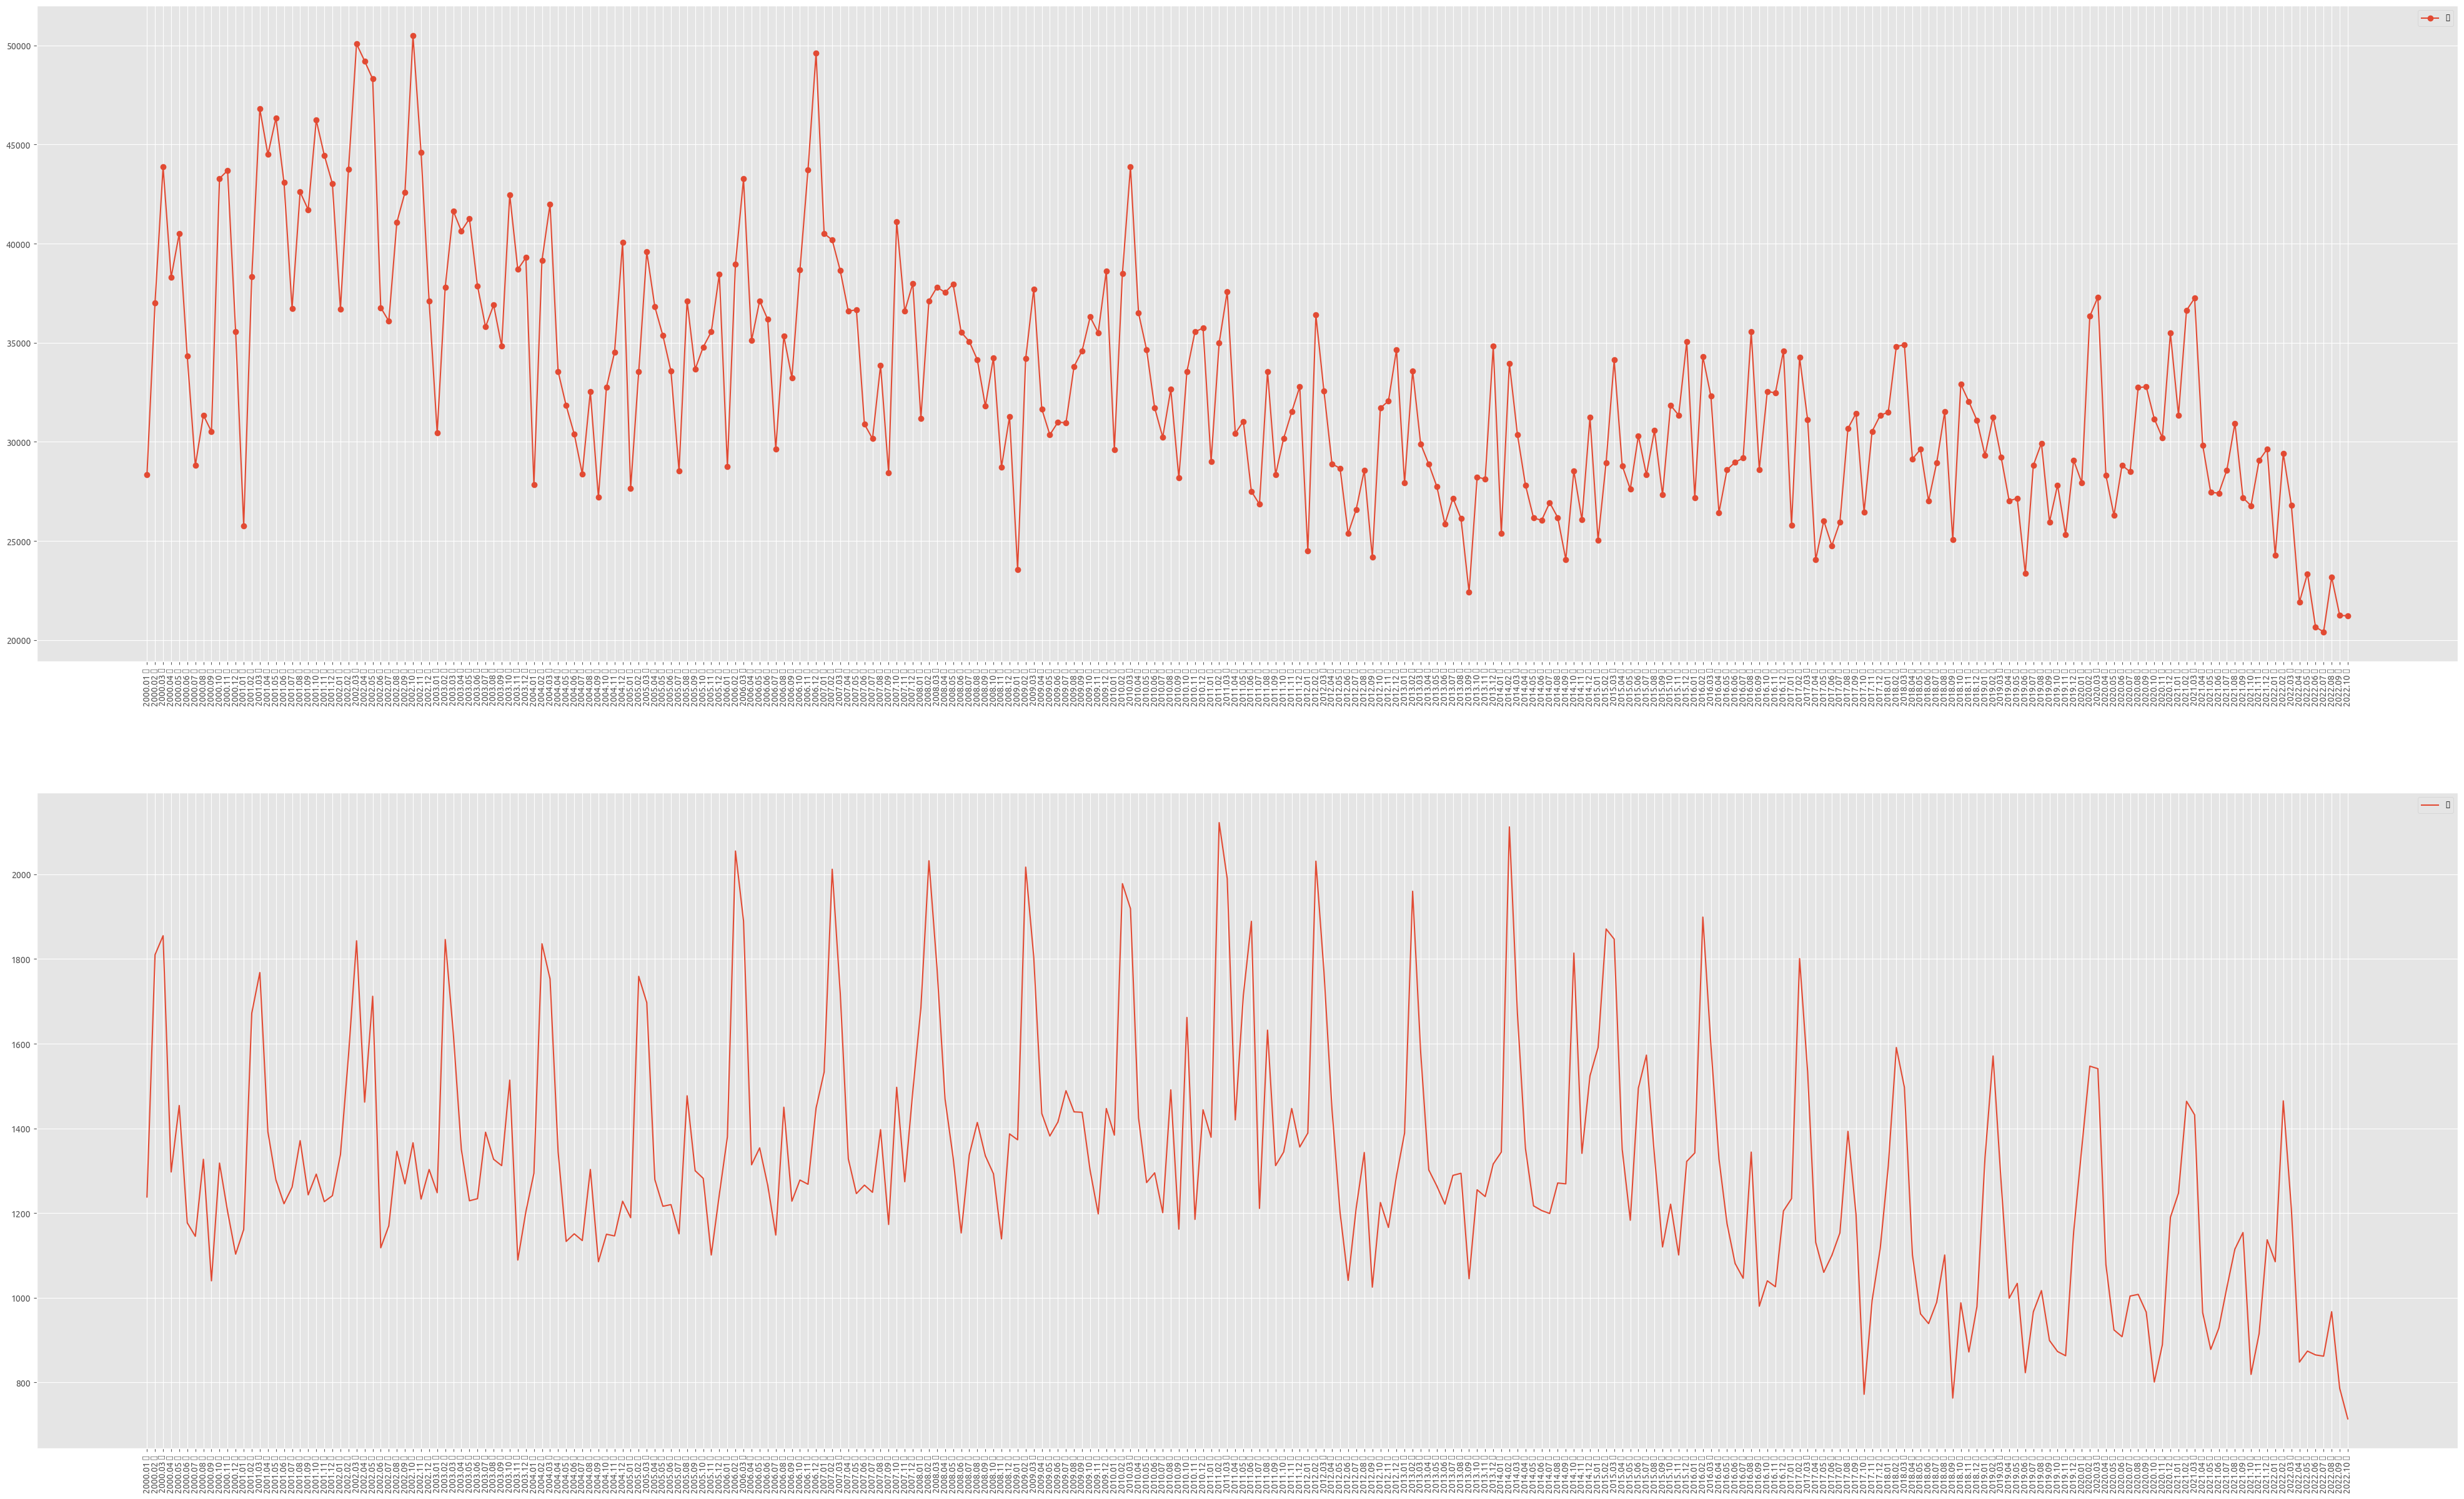

In [61]:
fig = plt.figure(figsize=(50, 30))
ax_1 = fig.add_subplot(2,1,1)
ax_2 = fig.add_subplot(2,1,2)
# 한글폰트 지정
# path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_name = fm.FontProperties(fname= path, size=10).get_name()
# plt.rc("font", family = font_name)

ax_1.plot(df_su2ggd.index, df_su2ggd.values, marker="o")
ax_1.set_xticklabels(df_su2ggd.index, rotation="vertical", size= 10)
ax_1.legend(labels="서울 -> 경기", loc="best")

ax_2.plot(df_su2bs.index, df_su2bs.values)
ax_2.set_xticklabels(df_su2bs.index, rotation="vertical", size= 10)
ax_2.legend(labels="서울 -> 부산", loc="best")
# ax_1.title("서울 -> 경기", size = 25)

# ax_1.xlabel("기간", size=15)
# ax_1.ylabel("인구 이동", size=15)



# 막대그래프

In [62]:
# 2000년 이후로 서울에서 ['부산광역시','대구광역시','인천광역시']로 이동한 인구를 막대그래프를 이용해 그려보세요 

In [95]:
df_5 = df_4.loc[['부산광역시','대구광역시','인천광역시']]

In [96]:
df_5 = df_5[df_5.columns[:-1]]

In [97]:
df_5.head()

,2000.01 월,2000.02 월,2000.03 월,2000.04 월,2000.05 월,2000.06 월,2000.07 월,2000.08 월,2000.09 월,2000.10 월,...,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월
전입지별,,,,,,,,,,,,,,,,,,,,,
부산광역시,1238.0,1810.0,1855.0,1297.0,1454.0,1177.0,1145.0,1327.0,1040.0,1318.0,...,1085,1465,1211,848,874,865,862,967,786,714
대구광역시,769.0,1186.0,1262.0,863.0,871.0,694.0,722.0,841.0,668.0,710.0,...,716,997,867,608,586,535,558,622,494,494
인천광역시,3098.0,4154.0,5530.0,4815.0,5292.0,4271.0,3579.0,4337.0,3878.0,5712.0,...,3032,4531,4126,3199,3835,3341,3840,4035,3340,3279


In [98]:
df_5.columns = pd.to_datetime(df_5.columns, format="%Y.%m 월")

In [99]:
df_5

,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01
전입지별,,,,,,,,,,,,,,,,,,,,,
부산광역시,1238.0,1810.0,1855.0,1297.0,1454.0,1177.0,1145.0,1327.0,1040.0,1318.0,...,1085,1465,1211,848,874,865,862,967,786,714
대구광역시,769.0,1186.0,1262.0,863.0,871.0,694.0,722.0,841.0,668.0,710.0,...,716,997,867,608,586,535,558,622,494,494
인천광역시,3098.0,4154.0,5530.0,4815.0,5292.0,4271.0,3579.0,4337.0,3878.0,5712.0,...,3032,4531,4126,3199,3835,3341,3840,4035,3340,3279


In [105]:
df_6 = df_5.T.loc[(df_5.columns >= pd.Timestamp(2010, 1, 1))]

<AxesSubplot: >

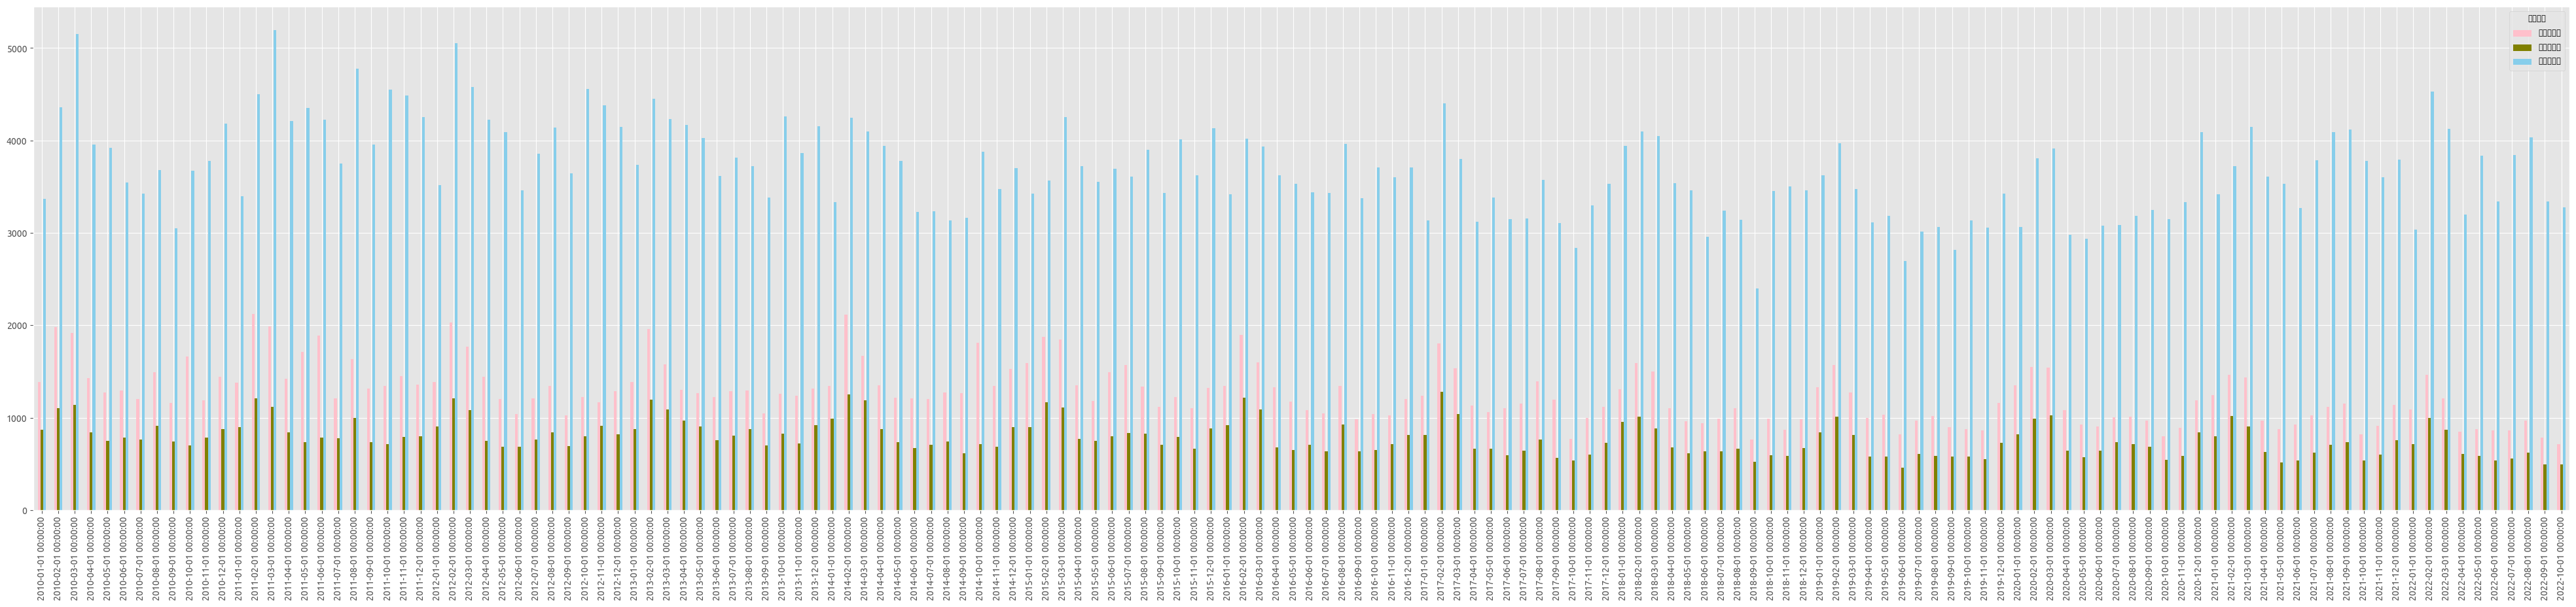

In [114]:
plt.style.use("ggplot")
df_6.plot(kind="bar", figsize=(50,10), color=["pink", "olive", "skyblue"])